# Fraudulent Credit Card Transactions Detection Models 

In this project some machine learning models are trained for classifying some credit card transactions into two classes: fraud or not fraud. The dataset that is considered is pretty huge, since it contains 1 million examples, and it is also unbalanced, since the vast majority of the considered transactions are not a fraud. As we know when we have a binary classification problem and we are dealing with an unbalanced dataset the accuracy of the model is not a good metric.

Thus, for these reasons the project is organized as follows: <br>

1. First of all a very simple EDA of the dataset is provided. The latter is done on the entire dataset. <br>
2. After that a new dataset, called df_model, is defined. The latter contains the first 5000 non fraudulent transaction and the first 5000 fraudulent ones. In this way we work around both the computational problem, due to the gigantic dataset, and the imbalance problem. Then some machine learning models are trained on this df_model dataset to predict if a transaction is fraudulent or not. Before that, a cross validation procedure is provided, thanks to RandomizedSearchCV, in order to tune the hyperparameters of all the considered models. These models are: <br>
* `K-Nearest Neighbors Classifier(KNN)` <br>
* `Decision Tree Classifier (DT)` <br>
* `Support Vector Classifier (SVC)` <br>
* `Random Forest Classifier(RF)`<br><br> 
3. The models are tested on the test set and the best model is choosen. It results to be DT. 
4. A third dataset, called df_tot, is created. The latter is builded by adding some randomly selected data from the original dataframe, and it contains 2 millions examples, 1 million of fraudulent transaction and 1 million of not fraudulent ones. After that, the DT model, which gave us the best performance on df_model, is trained on the a train dataset builded starting from df_tot, and then the model is tested, showing an extremely high performance.  

Here it is a prospectus of the variables into the dataset:

|   VARIABLE NAME 	|   VARIABLE DESCRIPTION	|   VARIABLE TYPE	| VALUES  	|
|---	|---	|---	|---	|
|  distance_from_home 	|   the distance from home where the transaction happened.	|   continuous numerical	|   	|
|   distance_from_last_transaction	|   the distance from last transaction happened	|   continuous numerical	|   	|
|   ratio_to_median_purchase_price	|   Ratio of purchased price transaction to median purchase price	|  continuous numerical 	|   	|
|   repeat_retailer		|  Is the transaction happened from same retailer 	|  binary	|  1: yes <br> 0: no|
|   used_chip		|   Is the transaction through chip (credit card)	|   binary	|   1: yes <br> 0: no|
|   used_pin_number	|    Is the transaction happened by using PIN number	|   binary	| 1: yes <br> 0: no  	|
|   online_order		|   Is the transaction an online order	|   binary	|   1: yes <br> 0: no	|
|  fraud 	|   Is the transaction fraudulent	|   binary	|   1: yes <br> 0: no	|

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

# ML standard libraries
from sklearn.preprocessing import MinMaxScaler as scaler 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix as CF
from sklearn.model_selection import RandomizedSearchCV as RSCV 

# Models 
from sklearn.neighbors import KNeighborsClassifier as KNN 
from sklearn.tree import DecisionTreeClassifier as DT 
from sklearn.svm import SVC 
from sklearn.ensemble import RandomForestClassifier as RF 

import warnings 
warnings.filterwarnings('ignore')

In [2]:
# I load the dataset
df=pd.read_csv('card_transdata.csv')
df

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


# EDA

First of all since all the variables, even the binary ones, are encoded as numerical I compute the correlation matrix between all of them:

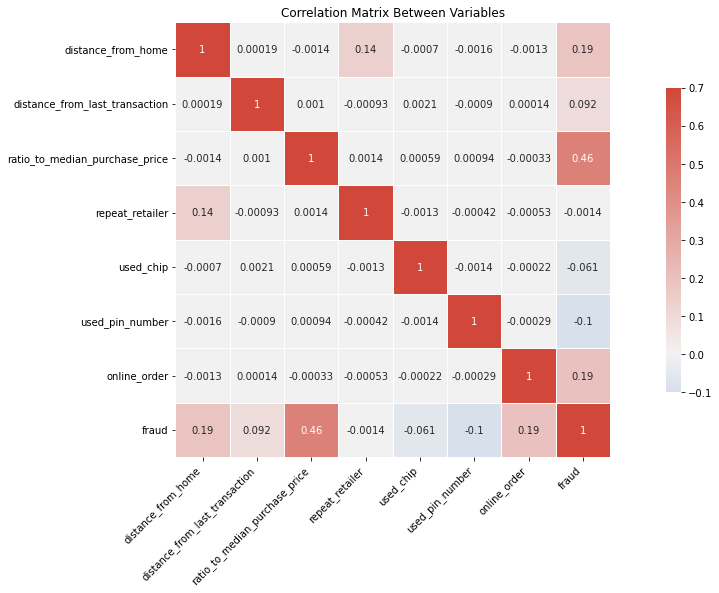

In [4]:
plt.figure(figsize=(20,8))
cmap = sns.diverging_palette(250, 15, as_cmap=True)
sns.heatmap(df.corr(),
            annot=True, vmax=.7, center=0, cmap=cmap,
            square=True, linewidths=.7, cbar_kws={"shrink": .7})

plt.title('Correlation Matrix Between Variables')
plt.xticks(rotation = 45, ha = 'right')
plt.show()

### As we can see from the correlation matrix there are no strong linear correlations between the variables. However the label, i.e. the 'fraud' variable, has a slight positive linear correlation with the variables 'distance_from_home', 'distance_from_last_transaction' and  'online_order', and a bigger one with the variable 'ratio_to_median_purchase_price'. Therefore, we might expect that these variables are the most important ones into the classification of a fraudulent transaction. 

Let us now rename some columns values in order to make the plot visualization cleaner:

In [5]:
# I rename some columns values in order to make the plot visualization cleaner 
D= {'repeat_retailer':{0.0: 'no', 1.0:'yes'}, 'used_chip':{0.0: 'no', 1.0:'yes'},
       'used_pin_number':{0.0: 'no', 1.0:'yes'}, 'online_order':{0.0: 'no', 1.0:'yes'}, 
    'fraud':{0.0: 'no', 1.0:'yes'}}

for column in list(D.keys()):
    df[column] = df[column].map(D[column])

Let us now see a pie plot for the label, i.e. the 'fraud' variable:

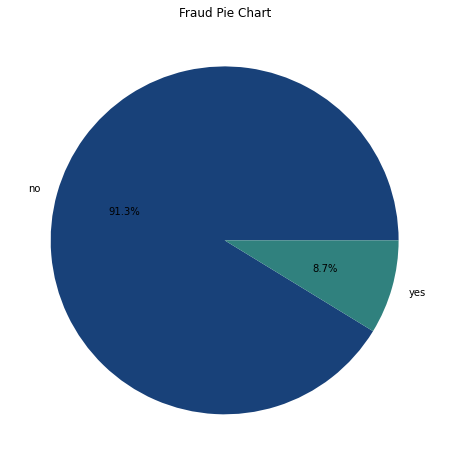

In [6]:
plt.figure(figsize=(14,8))
plt.pie(df['fraud'].value_counts(),
       labels=df['fraud'].value_counts().index, 
       autopct='%.1f%%', 
       colors=sns.color_palette('gist_earth'))
plt.title('Fraud Pie Chart')
plt.show()

### Thus, the vast majority of the transactions are not fraudulent. Consequentially, for evaluating the performance of a model the accuracy is not a good metric, because we have a strong imbalance between the two classes. Hence, in the prediction section we will define another dataset called df_model, which will be much smaller and balanced, in order to preserve accuracy as the evaluation metric for our models. 

Then we also plot some pie plots for the other binary variables:

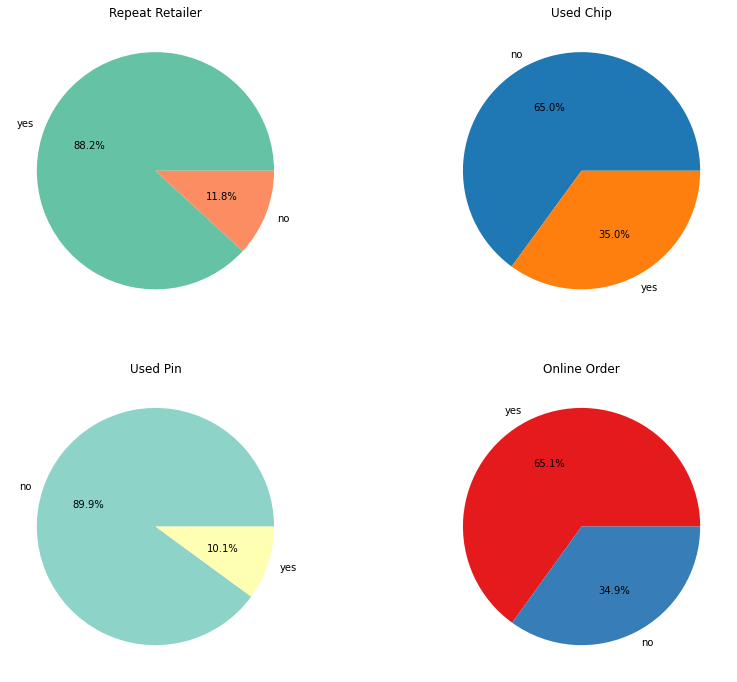

In [7]:
cols=['repeat_retailer', 'used_chip','used_pin_number', 'online_order']
palettes=['Set2', 'tab10', 'Set3', 'Set1']

f, axes=plt.subplots(2,2, figsize=(14,12))
for i,col in enumerate(cols):
    plt.subplot(2,2,i+1)
    plt.pie(df[col].value_counts() , 
           labels=df[col].value_counts().index,
           autopct='%.1f%%', 
           colors=sns.color_palette(palettes[i]))
    plt.title(col.split('_')[0].capitalize()+' '+col.split('_')[1].capitalize())
plt.show()

Let us now see the distribution of the three continuous numerical variables:

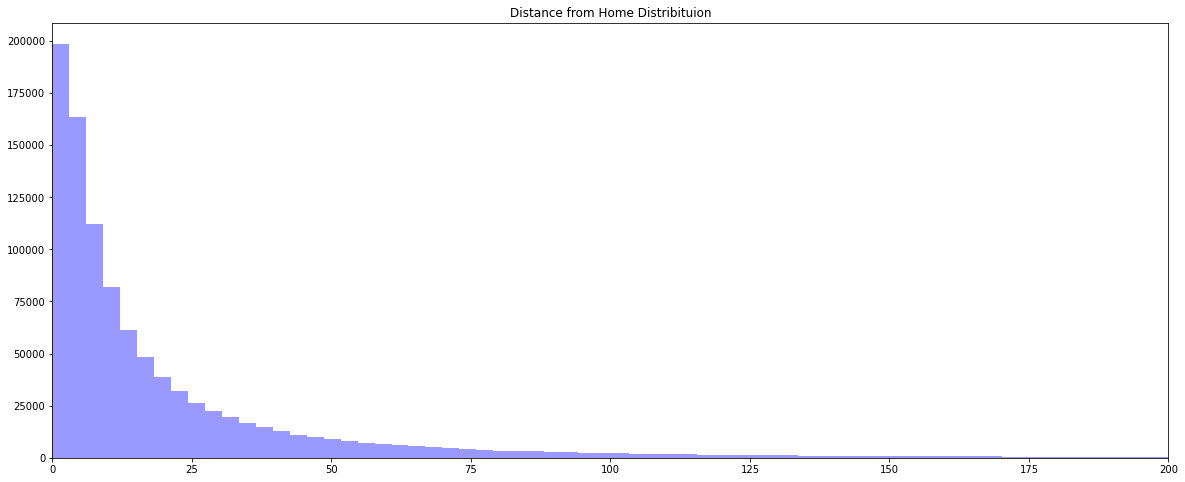

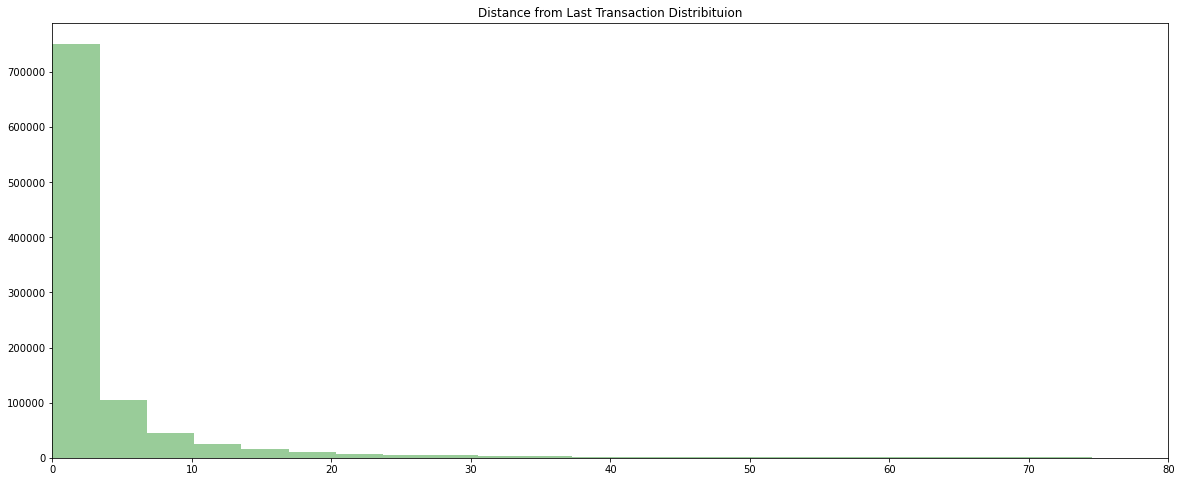

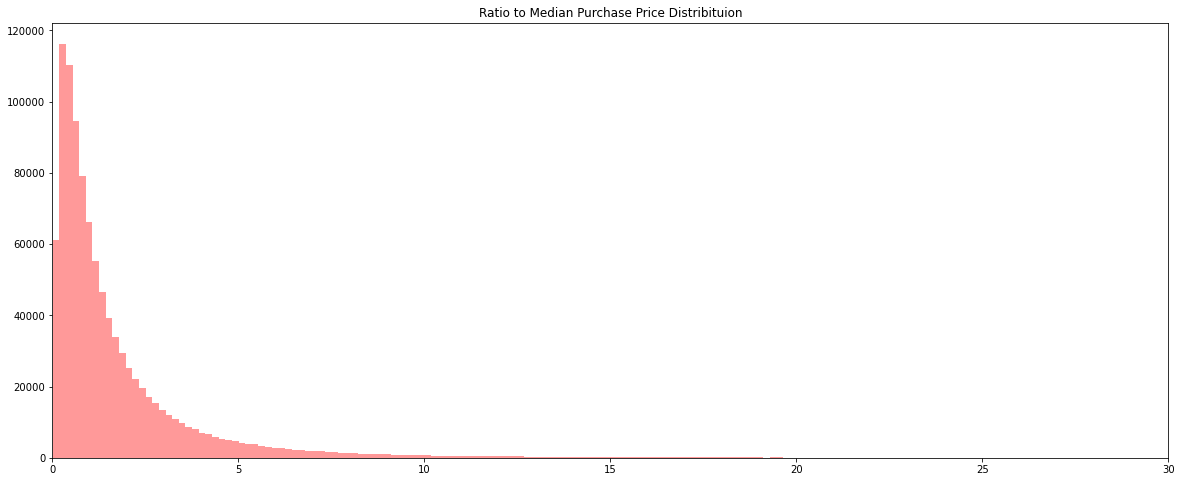

In [8]:
cols=['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price']
plt.figure(figsize=(20,8))
sns.distplot(x=df[cols[0]], kde=False , color='blue', bins=3500)
plt.xlim(0,200)
plt.title('Distance from Home Distribituion');

plt.figure(figsize=(20,8))
sns.distplot(x=df[cols[1]], kde=False, color='green', bins=3500)
plt.xlim(0,80)
plt.title('Distance from Last Transaction Distribituion');

plt.figure(figsize=(20,8))
sns.distplot(x=df[cols[2]], kde=False, color='red', bins=1500)
plt.xlim(0,30)
plt.title('Ratio to Median Purchase Price Distribituion');

### Therefore, all of these distributions are essentially exponential distributions. 

Lastly, let us see how the avarage value of the continuous numerical variables, which have a positive linear correlation with the label 'fraud' according to the correlation matrix analysis, changes if the transaction is fraudulent or not:

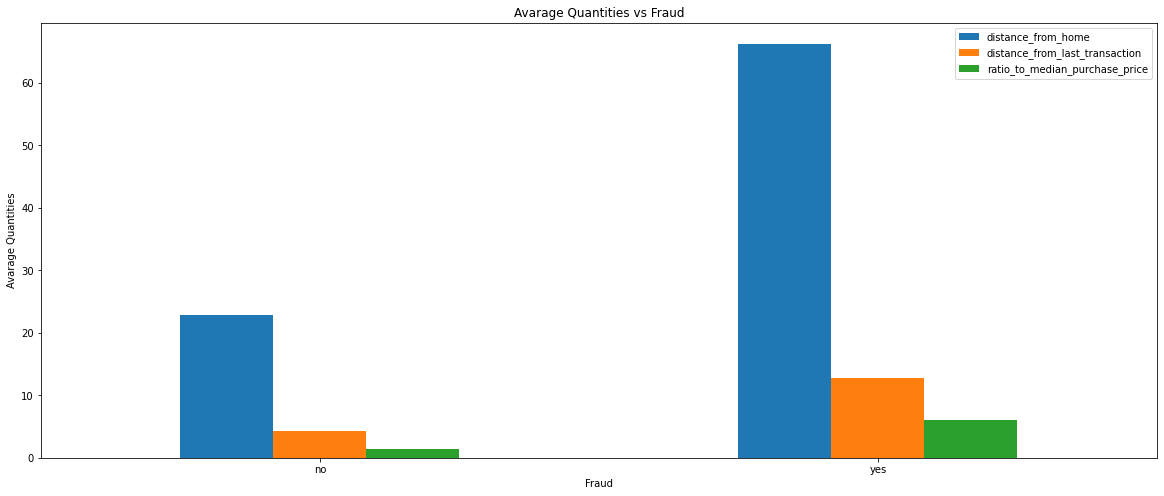

In [9]:
df.groupby('fraud')[cols].mean().plot(kind='bar', title='Avarage Quantities vs Fraud',
                   xlabel='Fraud', figsize=(20,8), rot=0)
plt.ylabel('Avarage Quantities');

### From this single plot it follows that the mean value of all these variables increases if the transaction is fraudulent, as we might expect from the correlation matrix analysis. 

# ML models

Let us now train some machine learning models in order to classify a credit card transaction. We start by reconverting the binary values into 0 and 1 values:

In [10]:
# I reconvert the values  
D= {'repeat_retailer':{'no':0, 'yes':1}, 'used_chip':{'no':0, 'yes':1},
       'used_pin_number':{'no':0, 'yes':1}, 'online_order':{'no':0, 'yes':1}}

for column in list(D.keys()):
    df[column] = df[column].map(D[column])

Then we define the dataframe df_model, which contains the first 5000 non fraudulent transactions and the first 5000 fraudulent ones. In this way we avoid both the computational and the imbalance problem:

In [11]:
df_model=df[df.fraud=='no'].iloc[:5000].append(df[df.fraud=='yes'].iloc[:5000])
df_model

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1,1,0,0,no
1,10.829943,0.175592,1.294219,1,0,0,0,no
2,5.091079,0.805153,0.427715,1,0,0,1,no
3,2.247564,5.600044,0.362663,1,1,0,1,no
4,44.190936,0.566486,2.222767,1,1,0,1,no
...,...,...,...,...,...,...,...,...
57908,56.637374,0.156493,5.634551,1,1,0,1,yes
57931,250.927770,0.696347,0.942289,1,0,0,1,yes
57962,0.661578,65.377620,1.207015,0,1,0,1,yes
57966,193.889343,1.275882,4.950638,1,1,0,1,yes


Now let us create the dataset with the features (X) and the labels (y):

In [12]:
X=scaler().fit_transform(df_model.drop('fraud', axis=1)) # features
y=df_model['fraud'].values  # labels 

In [13]:
print(X.shape, y.shape)

(10000, 7) (10000,)


Now we split the dataset into the training and the test set thanks to train_test_split:

In [14]:
# training-test splitting 
SEED=1
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=SEED)

Then we define two dictionaries 'models' and 'parameters', which contain the models and their hyperparameters that have to be tuned respectively.

In [15]:
models={'KNN': KNN(), 
        'DT': DT(), 
        'SVC': SVC(), 
        'RF': RF(random_state=SEED)}

parameters={'KNN':{'n_neighbors':[i for i in range(3,50)]}, 
           'DT':{'max_depth':[i for i in range(1,30)]}, 
           'SVC':{'kernel':['linear', 'poly',' rbf'], 'C':[i for i in range(101)],
                  'tol':[0.0001, 0.001, 0.01, 0.1], 'gamma':['scale','auto']},
           'RF':{'n_estimators':[i for i in range(10,100)],  
                'max_depth':[i for i in range(1,30)], 'max_features':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}
           }

Now we are ready for the **cross validation** procedure:

In [16]:
# cross validation 
cval={}
for model in models.keys():
    cval[model]=RSCV(models[model], parameters[model], cv=10, scoring='accuracy')
    cval[model].fit(X_train, y_train)
    print('The best parameters for '+model+' are: {}'.format(cval[model].best_params_))

The best parameters for KNN are: {'n_neighbors': 18}
The best parameters for DT are: {'max_depth': 19}
The best parameters for SVC are: {'tol': 0.1, 'kernel': 'linear', 'gamma': 'auto', 'C': 99}
The best parameters for RF are: {'n_estimators': 56, 'max_features': 0.1, 'max_depth': 9}


After that, we can redefine the models dictionary by replacing the values with the **best models** according to the cross validation.

In [17]:
# I redefine the models dictionary by introducing the 'best models' according to the cross validation
for model in models.keys():
    models[model]=cval[model].best_estimator_

And now we are ready for evaluating the models:

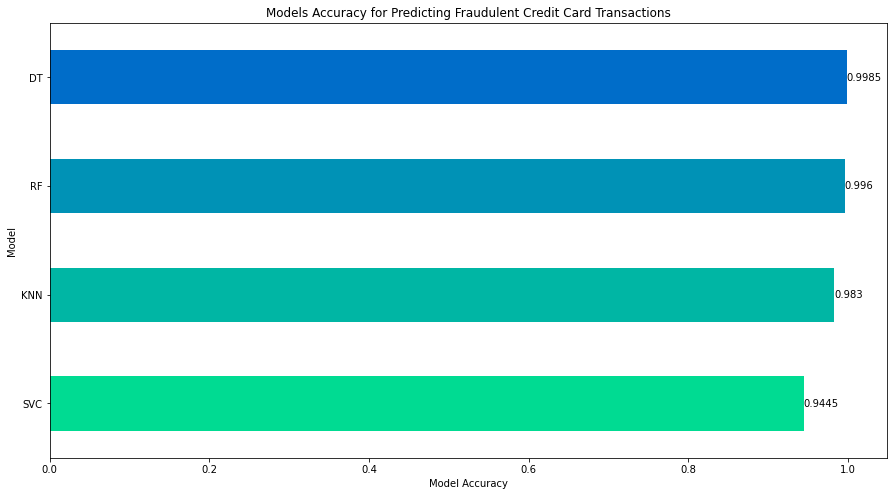

In [18]:
y_pred, accuracy={},{}

for model in models.keys():
    y_pred[model]=models[model].predict(X_test)
    accuracy[model]=round(accuracy_score(y_test, y_pred[model]),4)
 
plt.figure(figsize=(15,8))
ax=pd.Series(accuracy).sort_values().plot(kind='barh', 
                      title='Models Accuracy for Predicting Fraudulent Credit Card Transactions',
                      color=sns.color_palette('winter_r'))

for container in ax.containers:
    ax.bar_label(container)  
    
plt.xlabel('Model Accuracy')
plt.ylabel('Model')
plt.show()

### Thus, the best models, i.e. the models with the best accuracy, are DT and RF. The first one has a slightly higher accuracy then the second one. In order to choose between them it might be useful to consider the sensitivities and the specificities of both models. Indeed, these parameters tell us how the models perform on the two different classes and in some situations we might be interested to models with an high performance on a single class. In this situation, for example, we should be more interested in a model with an high performance on the value 'yes', namely a model which has a high performance in recognizing when a transition is a fraud, since it causes fewer problems to block a non fraudulent transaction with respect to not block one that is fraudulent.

Hence, for computing the sensitivities and specificities associated with the models we use the classification report:

In [19]:
report={}
for model in models.keys():
    report[model]=pd.DataFrame(classification_report(y_test, y_pred[model], output_dict=True)).transpose()

report['RF']

,precision,recall,f1-score,support
no,0.998033,0.994123,0.996075,1021.000
yes,0.993896,0.997957,0.995923,979.000
accuracy,0.996000,0.996000,0.996000,0.996
macro avg,0.995965,0.996040,0.995999,2000.000
weighted avg,0.996008,0.996000,0.996000,2000.000


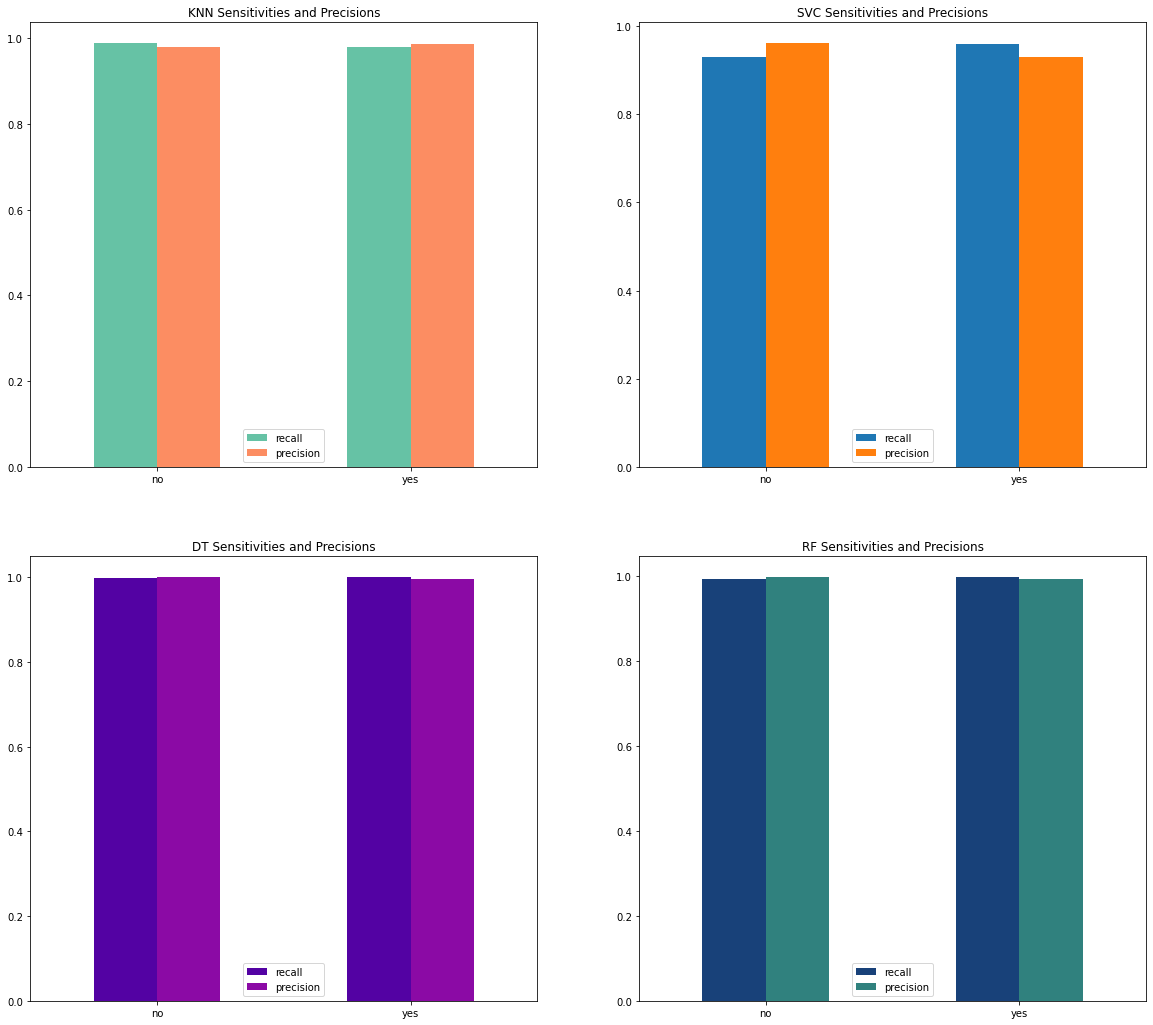

In [20]:
palettes=['Set2', 'tab10', 'plasma', 'gist_earth']

f, axes=plt.subplots(2,2,figsize=(20,18))

for i,model in enumerate(['KNN', 'SVC', 'DT', 'RF']):
    report[model][['recall', 'precision']].iloc[0:2].plot(kind='bar', title=model+' Sensitivities and Precisions', 
           rot=0, color=sns.color_palette(palettes[i]), ax=axes[i//2, i%2]);

### Let us remember that for the binary classification problems the recall of the 'True' ( or 'yes' in this case) class is the sensitivity of the model, while the recall of the 'False' ( or 'no' in this case) class is the specificity. RF and DT have essentially the same values of sensitivity and specificity. Thus, since DT has a slightly better accuracy, it is simpler and it requires less computational power, and the sensitivities are the same, we choose DT has the best model. 

In order to conclude the analysis we use the Random Forest feature_importances method for evaluating the most important variables for the RF model. 

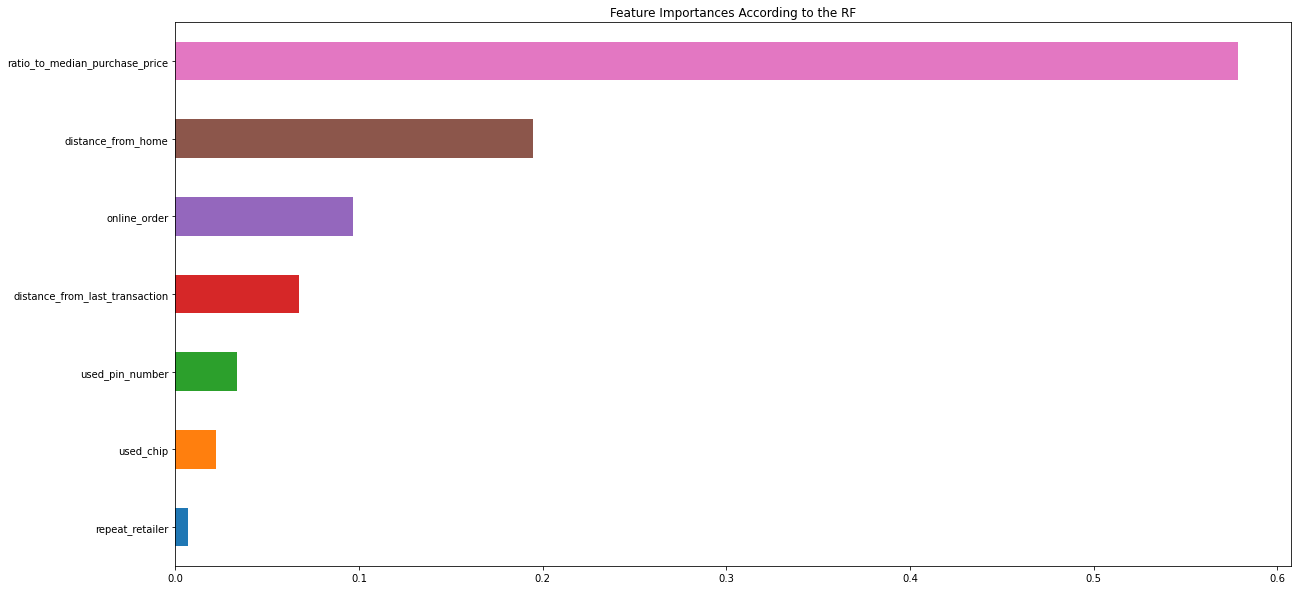

In [21]:
importances=pd.Series({df.columns[i]: models['RF'].feature_importances_[i] for i in range(df.shape[1]-1)})

plt.figure(figsize=(20,10))
importances.sort_values().plot(kind='barh', color=sns.color_palette('tab10'), title='Feature Importances According to the RF');

### Hence, the Random Forest consider as the most important features:  'ratio_to_median_purchase_price', 'online_order' and 'distance_from_home'. This is in complete agreement with the correlation matrix analysis, that indicates the same variables as the most relevant ones. 

# DT performance on a gigantic balanced dataset

To conclude the project let us see how the Decision Tree, i.e. the best model for predicting if a transaction is fraudulent, works with a gigantic balanced dataset. In order to build the dataset we define a dataframe df_tot, which contains 1 million fraudulent transaction and 1 million not fraudulent ones. The latter is created by adding to the dataframe df other 1 million data, randomly selected from df itself, in a way that guarantees the perfect balancing of the dataframe. <br>

Let us start by defining two dataframes, df_no_fraud and df_yes_fraud, which contains 1 million non fraudulent and 1 million fraudulent transactions respectively, and then we create the dataframe df_tot by merging these two dataframes. 

In [22]:
df_no_fraud=df[df.fraud=='no'].append(df[df.fraud=='no'].iloc[np.random.randint(df[df.fraud=='no'].shape[0], 
                    size=df.shape[0]-df[df.fraud=='no'].shape[0])])
df_no_fraud

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1,1,0,0,no
1,10.829943,0.175592,1.294219,1,0,0,0,no
2,5.091079,0.805153,0.427715,1,0,0,1,no
3,2.247564,5.600044,0.362663,1,1,0,1,no
4,44.190936,0.566486,2.222767,1,1,0,1,no
...,...,...,...,...,...,...,...,...
350169,2.830324,4.475900,0.467174,1,0,1,1,no
755613,2.875827,0.321683,0.424724,1,0,0,1,no
126084,35.958976,1.085962,3.918046,1,0,0,0,no
116765,14.647150,1.630556,1.128229,1,1,0,1,no


In [23]:
df_yes_fraud=df[df.fraud=='yes'].append(df[df.fraud=='yes'].iloc[np.random.randint(df[df.fraud=='yes'].shape[0], 
                    size=df.shape[0]-df[df.fraud=='yes'].shape[0])])
df_yes_fraud

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
13,2.131956,56.372401,6.358667,1,0,0,1,yes
24,3.803057,67.241081,1.872950,1,0,0,1,yes
29,15.694986,175.989182,0.855623,1,0,0,1,yes
35,26.711462,1.552008,4.603601,1,1,0,1,yes
36,10.664474,1.565769,4.886521,1,0,0,1,yes
...,...,...,...,...,...,...,...,...
904611,4.226941,94.041154,7.716440,1,1,0,1,yes
523557,1.180507,28.707863,6.015550,0,0,0,0,yes
240601,16.209810,0.442036,7.973433,1,0,0,1,yes
566622,150.009673,0.325771,0.167257,1,0,0,1,yes


In [24]:
df_tot=df_no_fraud.append(df_yes_fraud)
df_tot

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1,1,0,0,no
1,10.829943,0.175592,1.294219,1,0,0,0,no
2,5.091079,0.805153,0.427715,1,0,0,1,no
3,2.247564,5.600044,0.362663,1,1,0,1,no
4,44.190936,0.566486,2.222767,1,1,0,1,no
...,...,...,...,...,...,...,...,...
904611,4.226941,94.041154,7.716440,1,1,0,1,yes
523557,1.180507,28.707863,6.015550,0,0,0,0,yes
240601,16.209810,0.442036,7.973433,1,0,0,1,yes
566622,150.009673,0.325771,0.167257,1,0,0,1,yes


Now we create the new dataset (X, y), we divide the dataset into the training set (X_train, y_train) and the test set (X_test, y_test) and we use a cross validation procedure for tuning the hyperparameter 'max_depth' on this new dataset. 

In [25]:
X=scaler().fit_transform(df_tot.drop('fraud', axis=1)) # features
y=df_tot['fraud'].values  # labels 

# training-test splitting 
SEED=1
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=SEED)

cval1=RSCV(DT(), {'max_depth':[i for i in range(100)]}, cv=10, scoring='accuracy')
cval1.fit(X_train, y_train)
print('the best parameters for DT are: {}'.format(cval1.best_params_))

the best parameters for DT are: {'max_depth': 41}


Lastly, we plot the accuracy, the sensitivity and the specificity of the DT on this new dataset:

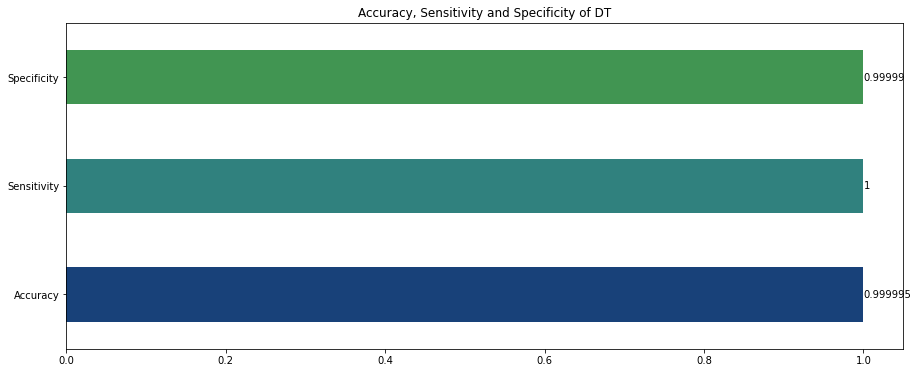

In [26]:
best_model=cval1.best_estimator_ #the DT with max_depth=41

report=classification_report(y_test, best_model.predict(X_test), output_dict=True) 

plt.figure(figsize=(15,6))
ax=pd.Series({'Accuracy': report['accuracy'],
'Sensitivity': report['yes']['recall'],
'Specificity': report['no']['recall']}).plot(kind='barh', title='Accuracy, Sensitivity and Specificity of DT', 
                                            color=sns.color_palette('gist_earth'))

for container in ax.containers:
    ax.bar_label(container)  
    
plt.show()

### As we can see the DT has an extremely high performance on this gigantic balanced dataset, with an accuracy of 99.9995%. 

# Conclusions

### In conclusion:

### 1) The model that furnishes the best performance in forecasting if a transaction is fraudulent or not on the small balanced dataset is the Decision Tree (DT), with an accuracy of 99.85%. 

### 2) The Random Forest indicates that the most important features for predicting if a transaction is fraudulent or not are: 'ratio_to_median_purchase_price', 'online_order' and 'distance_from_home'. This is in complete agreement with the EDA, and in particular with the correlation matrix analysis, which indicates the same variables as the most relevant ones.

### 3) The Decision Tree also shows an extremely high performance on the gigantic balanced dataset, which is obtained by adding other randomly selected data to the original dataframe df, with an accuracy of 99.9995%.